# Time independent Schrödinger equation in 1D

[**Download this notebook**](https://ifa-edu-it.github.io/learning-material/courses/quantum-mechanics/time-independent-schrödinger.ipynb)

The time independent Schrödinger equation in one dimension has for an arbitrary potential $V(x)$ the form
$$-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} \psi(x) + V(x) \, \psi(x) = E \, \psi(x) \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,(1)$$ 

The equation can be written in the compact form $H \,\psi(x) = E \, \psi(x)$, where the Hamiltonian $H = T + V$.

To allow for numerical sollution of the equation, the boundary conditions $\psi(0) = \psi(L) = 0$ are introduced.
This corresponds to placing the problem inside an infinite potential well with boundaries at $x = 0$ og $x = L$. 
If these boundaries are placed far from the states, we are investigating, there are no åproblems in implementing the boundary conditions.


### Units

A challenge when solving physical problems numerically is to do the calculations with suitable units and to keep track of the units in the calculations.

One possible way of handling units in this particular problem is to do the calculations with the dimensionless quantites $y$, $V'$ and $E'$ specified below and to follow the convention $\hbar = 1$, whereby $J = 1/s$ $\left( [\hbar] = Js\right)$.
Next we multiply by the mass $m$ on both sides in (1) and obtain

$$-\frac{1}{2} \frac{d^2}{dx^2} \psi(x) + mV(x) \, \psi(x) = mE \, \psi(x).$$

The position coordinate $x$ is still not unitless, and we therefor introduce the unitless coordinate $y = \frac{x}{L}$ and finally obtain the equation

$$-\frac{1}{2} \frac{d^2}{dy^2} \psi(y) + mL^2 \, V(y) \, \psi(y) = mL^2 \, E \, \psi(y) \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,(2)$$ 
with boundary conditions $\psi(y = 0) = \psi(y = 1) = 0$. 

Now the equation can be solved for the potential $V' = mL^2V$ and energy $E' = mL^2E$.



### Diskretization of the problem

When eq. (1) is solved analytically, it is solved for continous functions $V(x)$ and $\psi(x)$.
But a computer can't solve the problem numerically in infinitely many points, and it is therefor necessary to discretize the problem in order to solve it numerically.

We solve the problem for $N$ points $y_1, y_2, ..., y_N$, which are assumed to be evenly distributed with a distance $\Delta y$.
Likewise, the wavefunctions we find as solutions to the Schrödinger equation are represented by $N$ complex numbers $\psi(y_1), \psi(y_2) ..., \psi(y_N)$. These can be represented by a column vector
$\psi = 
\begin{bmatrix}
    \psi(y_1) \\
    \psi(y_2) \\
    \vdots    \\
    \psi(y_N)
\end{bmatrix}
$



The second derivative $\frac{d^2\psi(y)}{dy^2}$ i (2) can be approksimated by

$$\frac{d^2\psi(y)}{dy^2} \approx \frac{\psi(y_{n+1}) + \psi(y_{n-1}) - 2\psi(y_{n})}{(\Delta y)^2}.
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,(3)$$


This expression can be inserted in (2), which is now a discreet differens equation and ready to be solved numerically.

### Solution of the system as an eigenvalue problem

Now where the problem has been discretized, the wavefunctions $\psi(y)$, which as mentioned above is represented by a column vector, whilst operators can be represented by matrices.

Operators for the potential energy V' can be represented by the matrix

$$V' = 
\begin{bmatrix}
    V(y_1) & 0 & \cdots & 0 \\
    0 & V(y_2) & \cdots & 0 \\
    \vdots & \vdots & \ddots & \vdots   \\
    0 & 0 & \cdots & V(y_N)
\end{bmatrix}
.
$$

The first term in the Schrödinger equation represents the kinetic energy of the system. The operator for the kinetic energy $T$ given in the first term in eq. (2) can likewise be written at matrixform from the expression in (3)

$$
T = \frac{1}{2(\Delta y)^2}
\begin{bmatrix}
    2 & -1 & 0 & \cdots & 0 & 0 \\
    -1 & 2 & -1 & \cdots & 0 & 0 \\
    0 & -1 & 2 & \cdots & 0 & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots   \\
    0 & 0 & 0 & \cdots & 2 & -1 \\
    0 & 0 & 0 & \cdots & -1 & 2
\end{bmatrix}
.
$$

Hereby, the Hamilton for the system $H' = T + V'$ can be written in matrixform.

And the Schrödinger equation can be written as the matrix equation below and solved as a classical eigenvalue problem.


$$
\begin{bmatrix}
    \frac{1}{(\Delta y)^2} + V'(y_1) & -\frac{1}{2(\Delta y)^2} & \cdots & 0 \\
    -\frac{1}{(2\Delta y)^2} &  \frac{1}{(\Delta y)^2} + V'(y_2) & \cdots & 0 \\
    \vdots & \vdots & \ddots & \vdots   \\
    0 & 0 & \cdots &  \frac{1}{(\Delta y)^2} + V'(y_N)
\end{bmatrix}
\begin{bmatrix}
    \psi(y_1) \\
    \psi(y_2) \\
    \vdots    \\
    \psi(y_N)
\end{bmatrix}
=
E \,\begin{bmatrix}
    \psi(y_1) \\
    \psi(y_2) \\
    \vdots    \\
    \psi(y_N)
\end{bmatrix}
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,(4)
$$


### Code for numerical solution


Above the time independent Schrödinger equation in 1D was discretized and written in matrixform, which can be solved as a simple eigenvalue problem by use of the function `numpy.linalg.eigh()`([**documentation**](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html?highlight=linalg%20eigh#numpy.linalg.eigh.)).
The matrices representing the operators are constructed using the function `np.diag()` ([**documentation**](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)). 



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

hbar = 1.055e-34 #J/s
N = 2000
dy = 1 / 100
y = np.linspace(0, 1, N + 1)

In [16]:
# Matrix representation of the potential V_ = V' = mL^2V:

### Harmonic oscillator:
#pot = 5000 * (y - 0.5) ** 2
### Infinite square well:
pot = 100*(y > 0.6) + 100*(y < 0.4)
### Infinite well with Gaussian bump:
#pot = 100*(y > 0.6) + 100*(y < 0.4) + 50 * np.exp(-(y - 0.55)**2 / (2 * 0.01**2))
### Modified infinite well :
#pot = 100*(y > 0.7) + 100*(y < 0.3) + 10 * (y > 0.6)

V_ = np.diag(pot)   # Converts the potential to a diagonal N*N matrix


In [17]:
# Matrix representation of T:

T = 1 /(2 * dy**2) * (2 * np.diag(np.ones(N+1)) - np.diag(np.ones(N), 1) - np.diag(np.ones(N), -1))

# Hamiltonian
H = T + V_

# Solution of the eigenvalue problem 
# E contains the eigenvalues / energies, and W contains the eigen functions / wavefunctions:
[E, W] = np.linalg.eigh(H)


## Normalization and plot of wavefunctions

Now a collection of solutions for the system has been calculated. $E$ is an array containing the energies, whilst $W$ is a matrix comprised of columns of eigenfunctions. The energies in $E$ are sorted after magnitude with the smallest energy first, and the vector element $E[i]$ is the energy corresponding to the wavefunction $W[:,\, i]$.

It is to be considered that all of the solutions $W[:,i]$ are normalized as vectors - ie. $\Sigma_{k = 0}^{n} (W[k,i])^2 = 1$ for each of the $i$ solutions. 
In order to norm each solution, so it constitutes an actual wavefunction, it has to be "re-normalized", so the integral $|\psi_i(y)|^2$ equals 1.
This is performed by defining the quantity `normsquare`, where the function `np.trapz` integrates over the wavefunction $\psi_i$ with respect to $y$. 

Furthermore, it is important to note that in the units employed in this solution, the energies are given in units of $\frac{mL^2}{\hbar^2}$, so the actual energy can be computed as $E = \frac{\hbar^2}{mL^2} E'$.


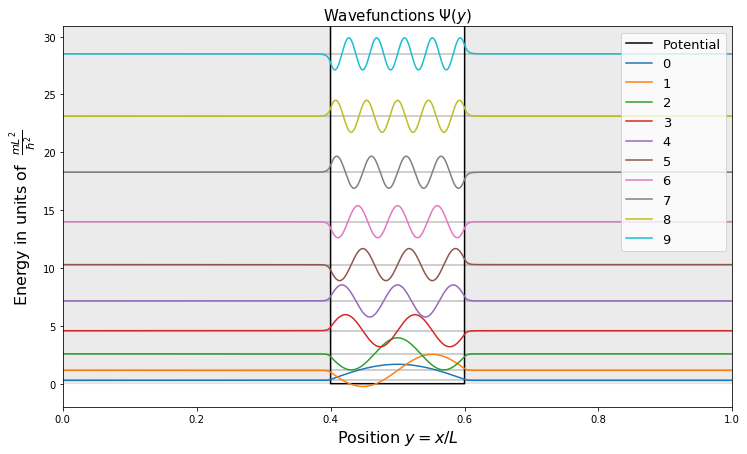

In [18]:
plt.figure(figsize = (12, 7))
plt.plot(y, pot, color = "black", label = "Potential")
plt.fill_between(y, np.zeros(N+1), pot, color = "black", alpha = 0.08)
maxlim = 0

for i in range(10):
    
    normsquare = np.trapz(W[:,i]**2, dx = dy)
    psi_num = W[:,i] / np.sqrt(normsquare)*2
    energy = E[i]
    
    plt.plot(y, psi_num + energy, label = f'{i}')
    plt.hlines(energy, 0, 1, color = "grey", alpha = 0.5)
    
    if i == 9:
        maxlim = max(psi_num) + energy + 1

plt.title(r"Wavefunctions $\Psi(y)$", fontsize = 15)
plt.ylabel(r"Energy in units of  $\frac{mL^2}{\hbar^2}$", fontsize = 16)
plt.xlabel(r"Position $y = x / L$", fontsize = 16)
plt.ylim(-2, maxlim)
plt.xlim(0, 1)
plt.legend(fontsize = 13, loc = "upper right")